<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch5. 1~5

pg. 290-319

# [Chapter 5] 회귀

## 5-1. 회귀 소개

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

- 독립변수 - 피처 / 종속변수 - 결정 값

- 머신러닝 회귀 예측의 핵심 : 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 **'회귀 계수'**를 찾아내는 것
- 선형 회귀 : 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식
  - 일반 선형 회귀 : RSS(Residual Sum of Squares) 최소화, 규제를 적용하지 않은 모델
  - 릿지(Ridge) : 선형회귀에 L2 규제 추가
  - 라쏘(Lasso) : 선형 회귀에 L1 규제 추가
  - 엘라스틱넷(ElasticNet) : L2, L1 함께 결합
  - 로지스틱 회귀 : 분류에 사용되는 선형 모델

    - L1 규제 : 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함
    - L2 규제 : 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듦

## 5-2. 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀 : 독립변수, 종속변수 1개
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값

  전체 데이터의 **잔차 합이 최소**가 되는 모델이 최적의 회귀 모델

- RSS는 비용(cost)
- 회귀 계수로 구성되는 RSS는 비용 함수(손실 함수, loss function 이라고도 함)
- 머신러닝 회귀 알고리즘은 비용 함수가 반환하는 값을 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구함

## 5-3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- 경사 하강법 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W를 구하는 방식

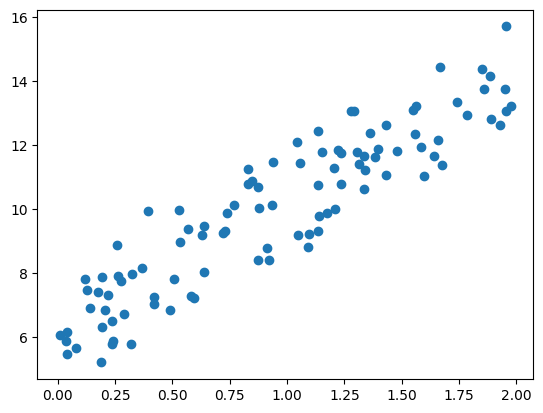

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도를 시각화
plt.scatter(X, y)

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

- RSS 구하는 함수

In [ ]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


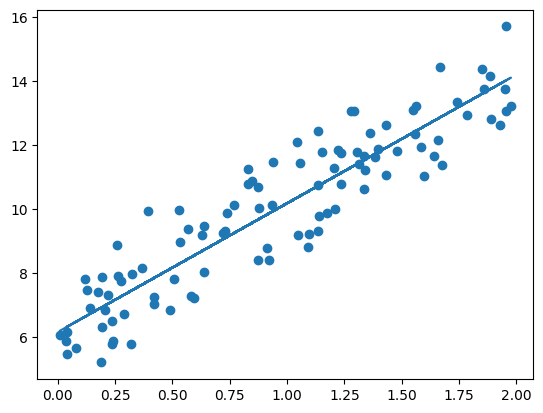

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사 하강법을 이용해 회귀선이 잘 만들어짐
- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 값을 업데이트하기 때문에 수행 시간이 오래 걸린다는 단점이 존재
- 따라서 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent) 이용
  - 확률적 경사 하강법 : 전체 입력 데이터가 아닌 일부 데이터만 이용해 W가 업데이터되는 값을 계산

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

- 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 w1_update, w0_update를 계산함

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- (미니 배치) 확률적 경사 하강법으로 구한 w1, w0가 경사 하강법으로 구한 것과 큰 차이가 없음

## 5-4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### **LinearRegression 클래스 - Ordinary Least Squares**



*LinearRegression*

: 예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
  - fit() : X, y 배열을 입력받으면 회귀 계수를 coef_ 속성에 저장



OLS 기반 회귀 계수 계산은 입력 피처의 *독립성*에 영향을 많이 받음
- 다중 공선성(multi-collinearity) 문제 : 피처 간의 상관관계가 매우 높은 경우, 분산이 매우 커져서 오류에 민감해짐
  - 독립적인 중요한 피처만 남기고 제거, 규제 적용
  - 많은 피처가 다중 공선성 문제를 가진다면 PCA를 통해 차원 축소

### **회귀 평가 지표**

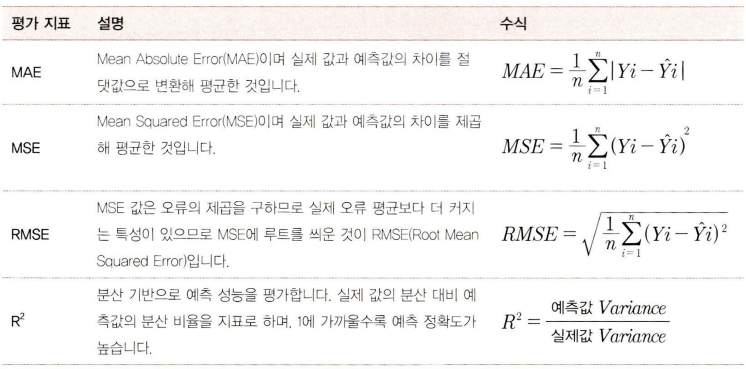

- MSLE(Mean Squared Log Error) : MSE에 로그 적용
- RMSLE : MSLE에 루트를 씌움

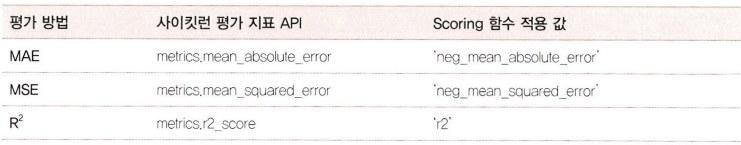

- scoring 함수는 score 값이 클수록 좋게 평가
- 회귀 평가 지표의 경우 값이 커질수록 나쁜 모델이므로 scoring 함수에 일반적으로 반영하려면 -1을 곱함

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# boston 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston, columns=feature_names)

print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


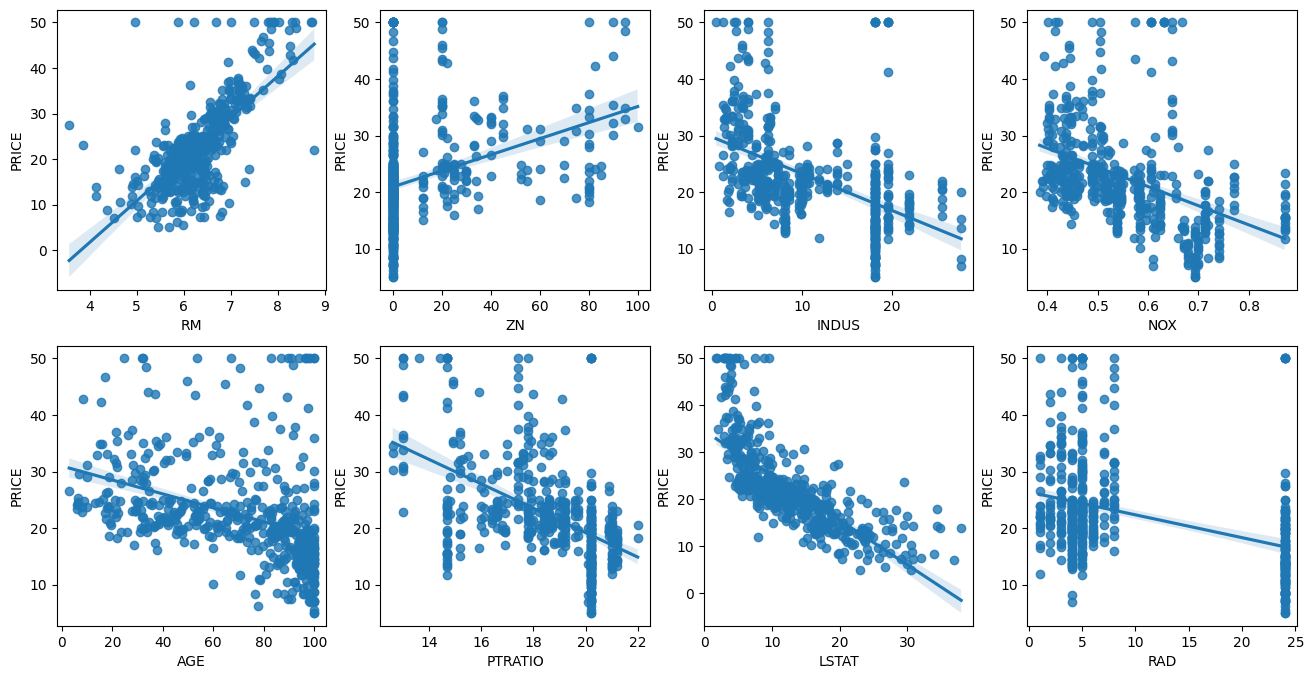

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])


- seaborn의 regplot : X, Y 의 산점도와 함께 선형 회귀 직선을 그려줌
- RM, LSTAT 칼럼이 PRICE 영향도가 가장 두드러지게 나타남

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM이 양의 값으로 회귀 계수가 가장 큼
- NOX 피처의 회귀 계수 -값이 너무 큼

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE : 5.829


## 5-5. 다항 회귀와 과(대)적합/과소적합 이해

### **다항 회귀 이해**

독립변수와 종속변수의 관계가 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 회귀
- 선형 회귀임
- 회귀 계수가 선형/비선형인지에 따라, 선형/비선형 회귀로 나뉨 (독립 변수는 무관)

PolynomialFeatures 클래스
- 피처를 Polynomial(다항식) 피처로 변환
- degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀의 차수가 높아질수록 과적합의 문제가 크게 발생

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) + 0.1


Degree 1 회귀 계수는 [-2.55] 입니다.
Degree 1 MSE 는 1.7856083797634674 입니다.

Degree 4 회귀 계수는 [ -9.2   25.27 -46.41  28.67] 입니다.
Degree 4 MSE 는 3.208460773916078 입니다.

Degree 15 회귀 계수는 [-2.98293100e+04  1.03909386e+06 -1.87416123e+07  2.03716034e+08
 -1.44873283e+09  7.09315377e+09 -2.47065792e+10  6.24561050e+10
 -1.15676510e+11  1.56894936e+11 -1.54006023e+11  1.06457264e+11
 -4.91377530e+10  1.35919645e+10 -1.70380786e+09] 입니다.
Degree 15 MSE 는 18123825688.825127 입니다.


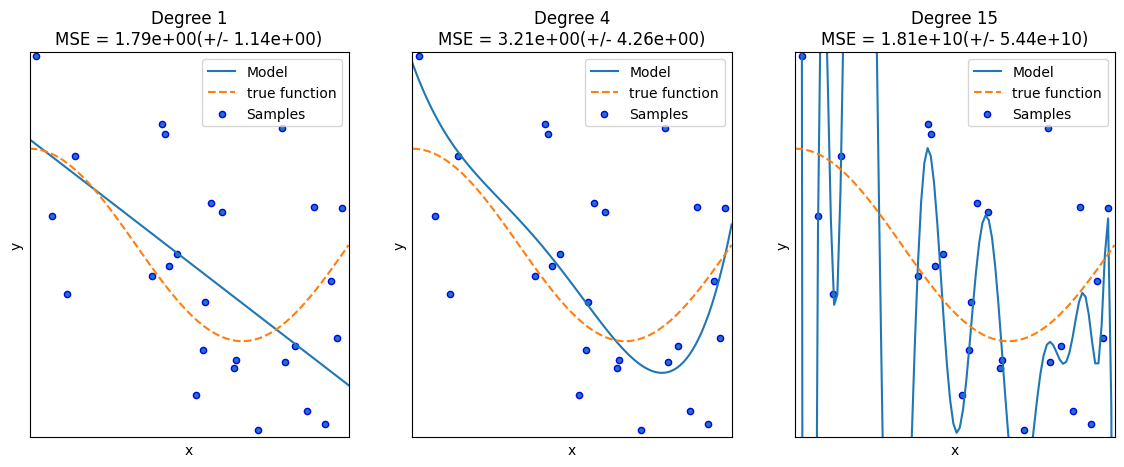

In [ ]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label="true function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

실선 - 다항 회귀 예측 곡선

점선 - 실제 데이터 세트의 코사인 곡선

- Degree 1 예측 곡선 : 실제 데이터 세트를 예측하기에는 너무 단순함. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하는 과소적합 모델
- Degree 4 예측 곡선 : 실제 데이터 세트와 유사
- Degree 15 : 데이터 세트의 변동 잡음 값까지 지나치게 반영하여 학습 데이터 세트만 정확히 예측, 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐 -> 과적합

### 편향-분산 트레이트오프(Bias-Variance Trade off)

- Degree 1 모델은 매우 단순화된 모형, 지나치게 한 방향성으로 치우침 -> 고편향(High Bias)성
- Degree 15 모델은 매우 복잡하고 지나치게 높은 변동성을 가짐 -> 고분산(High Variance)성

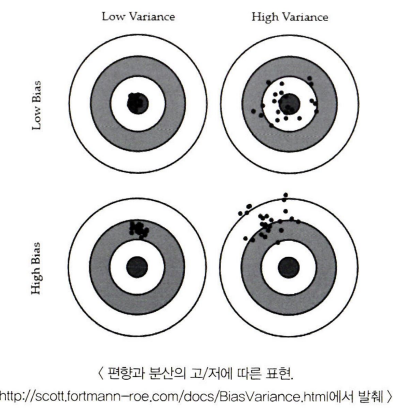

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향

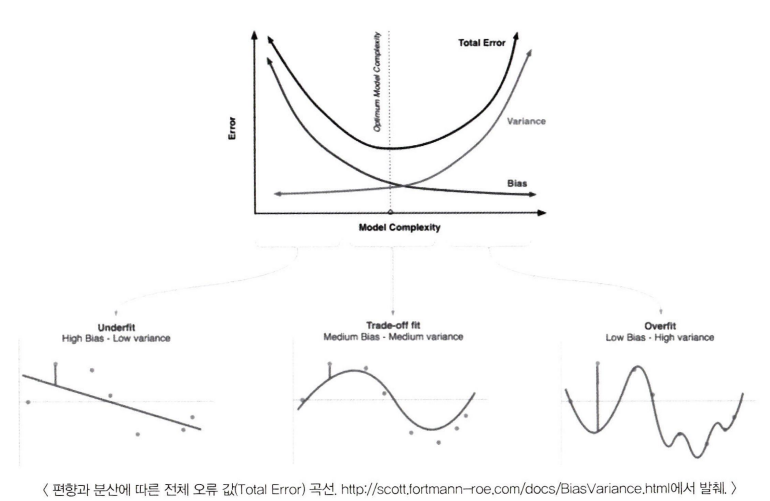

- 편향이 높으면 전체 오류가 높고, 편향을 낮추면 분산이 높아지며 전체 오류가 낮아짐
- 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과한 후 분산을 지속적으로 높이면 전체 오류 값이 다시 증가

- 높은 편향/ 낮은 분산 : 과소적합되기 쉬움
- 낮은 편향/ 높은 분산 : 과적합되기 쉬움

- 가장 효율적인 머신러닝 모델 : 편향과 분산이 서로 트레이드오프를 이루며 오류 Cost 값이 최대로 낮아지는 모델